## Volume based trading 

looking at medium frequency trading in high volatile hours

<Figure size 1200x800 with 0 Axes>

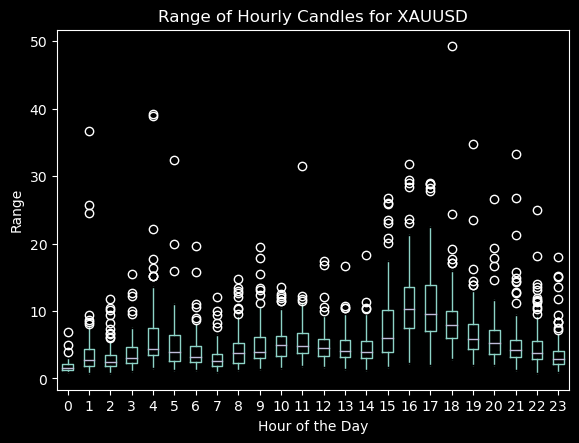

In [8]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
plt.style.use('dark_background')

# Initialize MetaTrader 5
mt5.initialize()

# Settings
symbol = 'XAUUSD'
timeframe = mt5.TIMEFRAME_H1
start_date = datetime(2024, 1, 1)
end_time = datetime.now()

# Function to get data from MetaTrader 5
def get_data(symbol, timeframe, start_date, end_time):
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_time)
    if rates is None:
        raise ValueError(f"Failed to get rates for {symbol}")
    df = pd.DataFrame(rates)
    df = df[['time', 'open', 'high', 'low', 'close', 'tick_volume']]
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def calculate_range(symbol, timeframe, start_date, end_time):
    data = get_data(symbol, timeframe, start_date, end_time)
    data['range'] = data['high'] - data['low']
    return data

data = calculate_range(symbol, timeframe, start_date, end_time)

# Extract the hour from the index and group by hour
data['hour'] = data.index.hour

# Create a boxplot
plt.figure(figsize=(12, 8))
data.boxplot(column='range', by='hour', grid=False)
plt.title(f'Range of Hourly Candles for {symbol}')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by hour' title
plt.xlabel('Hour of the Day')
plt.ylabel('Range')
plt.show()


In [25]:
xauusd = get_data(symbol, mt5.TIMEFRAME_M5, datetime(2024, 6, 2), datetime(2024, 6, 8))
# Calculate the moving average of the tick volume
xauusd['tick_volume_ma'] = xauusd['tick_volume'].rolling(window=20).mean()
xauusd

,open,high,low,close,tick_volume,tick_volume_ma
time,,,,,,
2024-06-03 01:05:00,2328.65,2328.75,2326.50,2326.96,340,NaN
2024-06-03 01:10:00,2327.04,2327.06,2324.15,2325.09,345,NaN
2024-06-03 01:15:00,2325.05,2326.58,2325.05,2325.90,163,NaN
2024-06-03 01:20:00,2325.89,2325.91,2324.48,2325.18,154,NaN
2024-06-03 01:25:00,2325.16,2325.16,2323.25,2323.27,229,NaN
...,...,...,...,...,...,...
2024-06-07 22:40:00,2293.82,2294.33,2293.52,2293.67,530,536.70
2024-06-07 22:45:00,2293.76,2294.10,2289.77,2290.36,784,553.10
2024-06-07 22:50:00,2290.37,2292.26,2289.78,2290.75,760,567.95


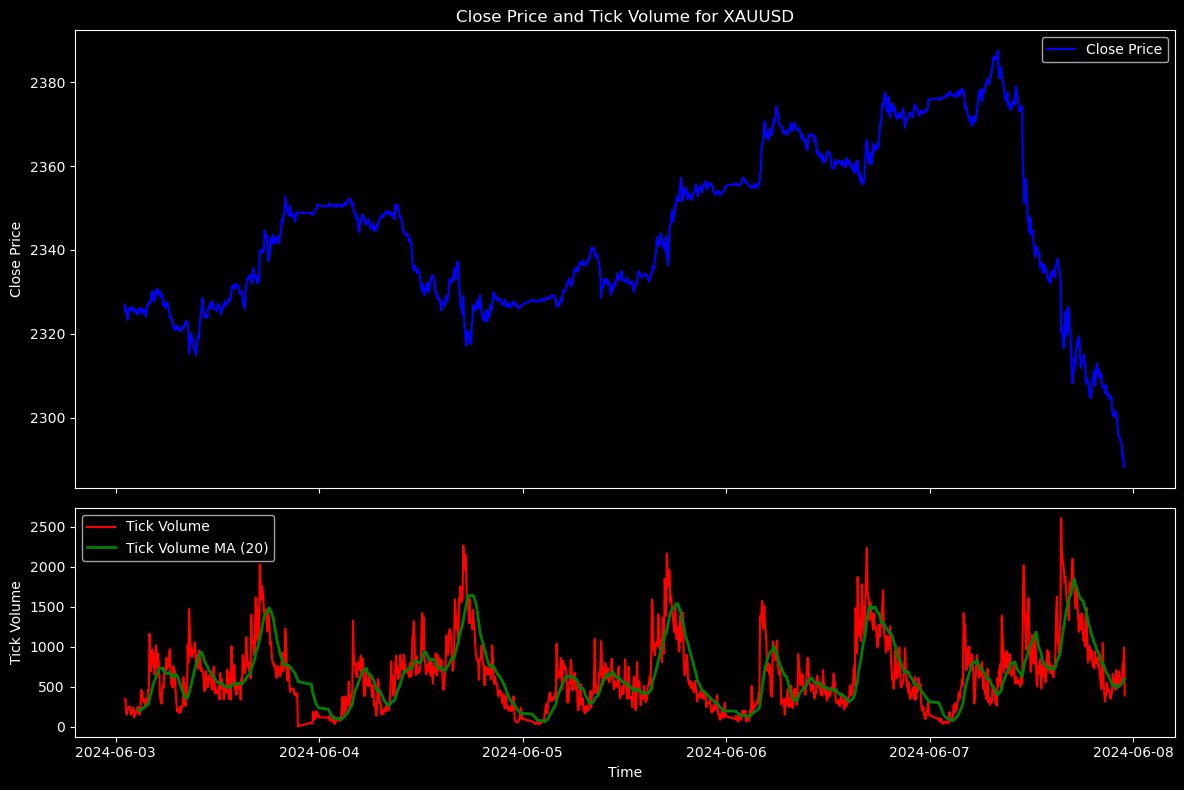

In [33]:
# Plotting the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plot the close prices
ax1.plot(xauusd.index, xauusd['close'], label='Close Price', color='blue')
ax1.set_ylabel('Close Price')
ax1.set_title('Close Price and Tick Volume for XAUUSD')
ax1.legend()

# Plot the tick volume
ax2.plot(xauusd.index, xauusd['tick_volume'], color='red', label='Tick Volume')

# Plot the moving average of the tick volume
ax2.plot(xauusd.index, xauusd['tick_volume_ma'], label='Tick Volume MA (20)', color='green', linewidth=2)

ax2.set_ylabel('Tick Volume')
ax2.set_xlabel('Time')
ax2.legend()

plt.tight_layout()
plt.show()